/tmp/ipython-input-810123392.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


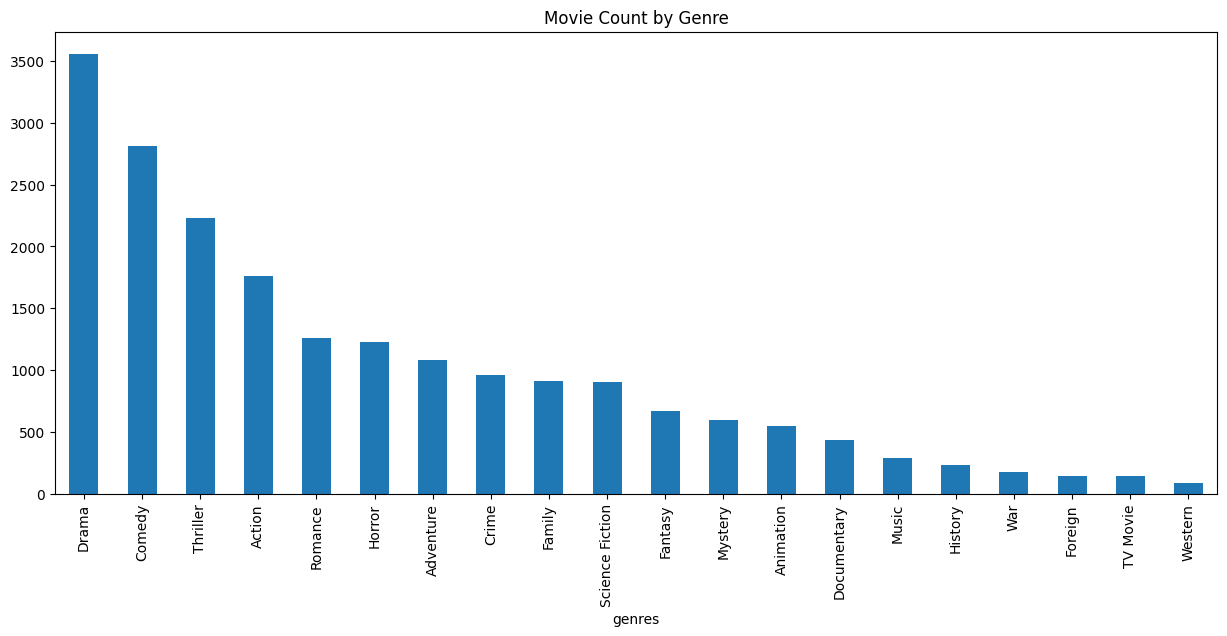

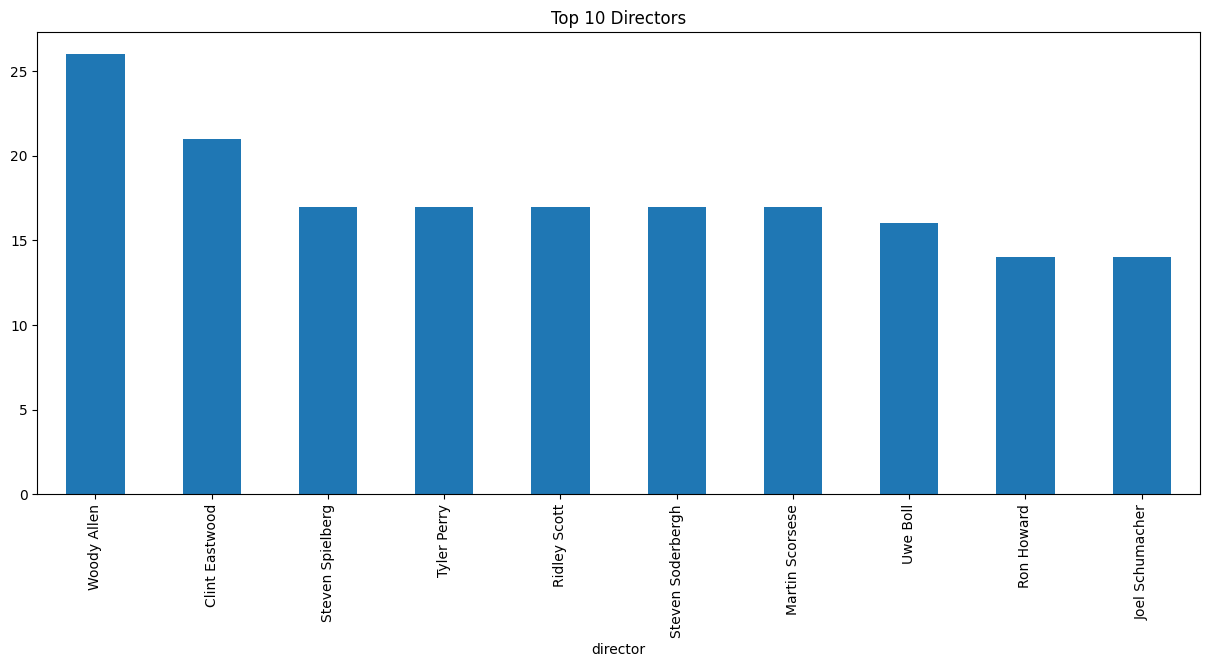

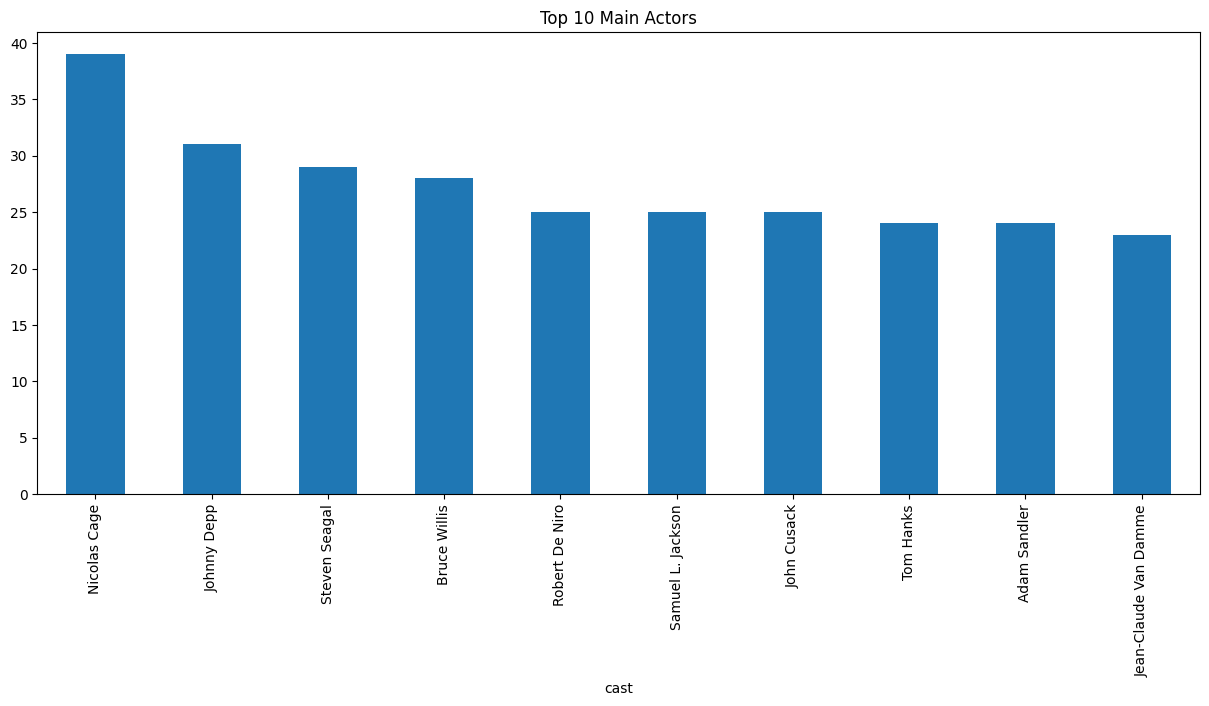

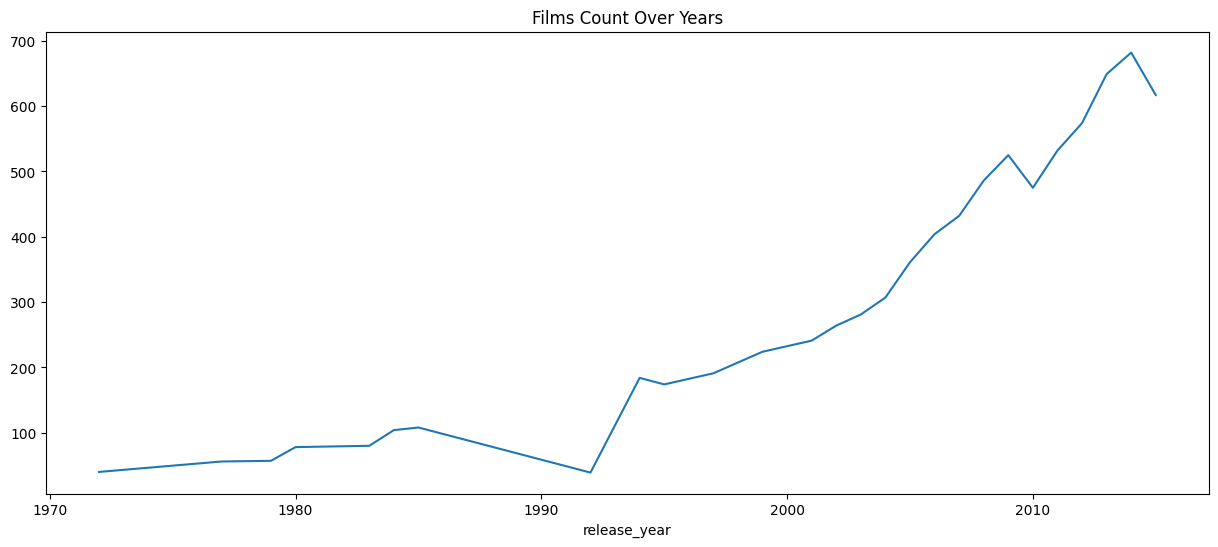

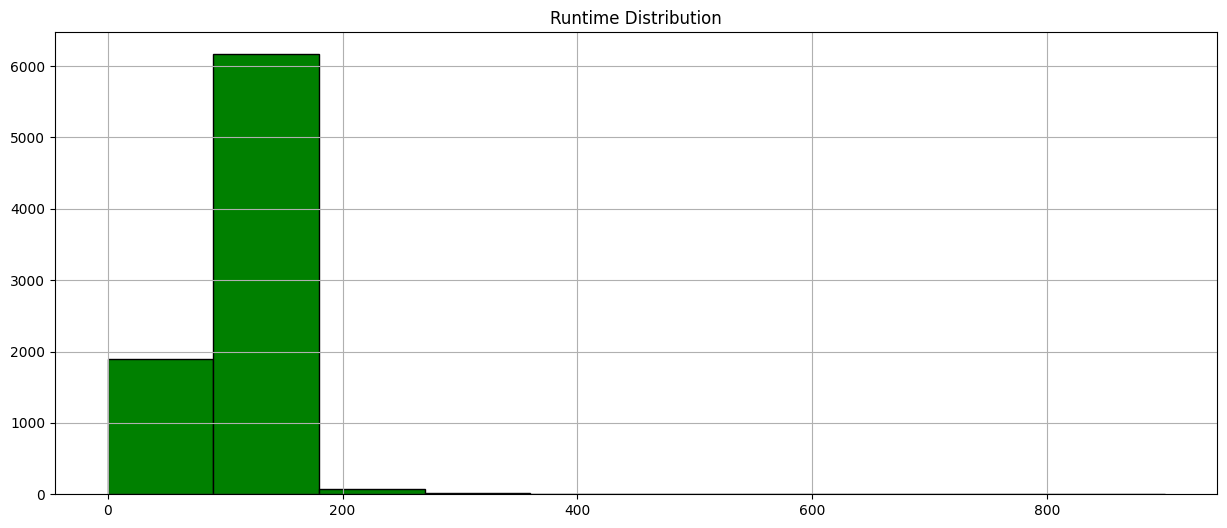

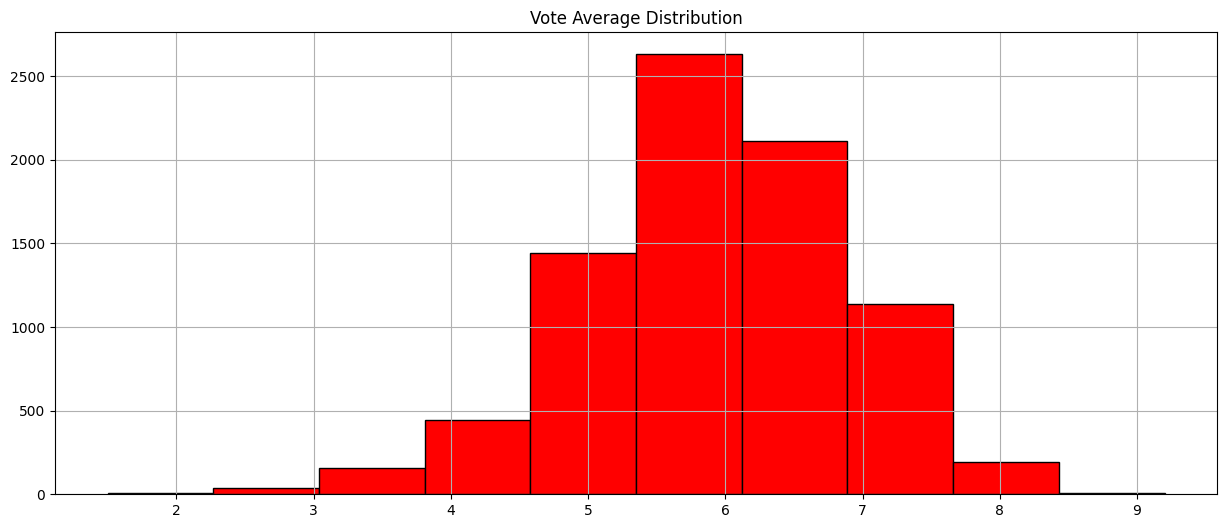

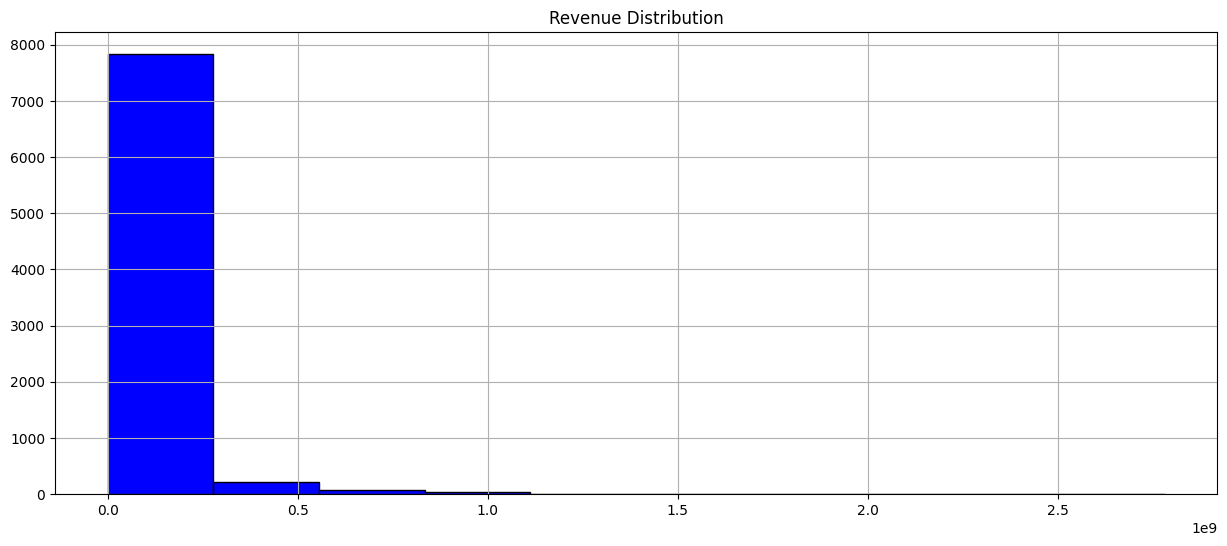

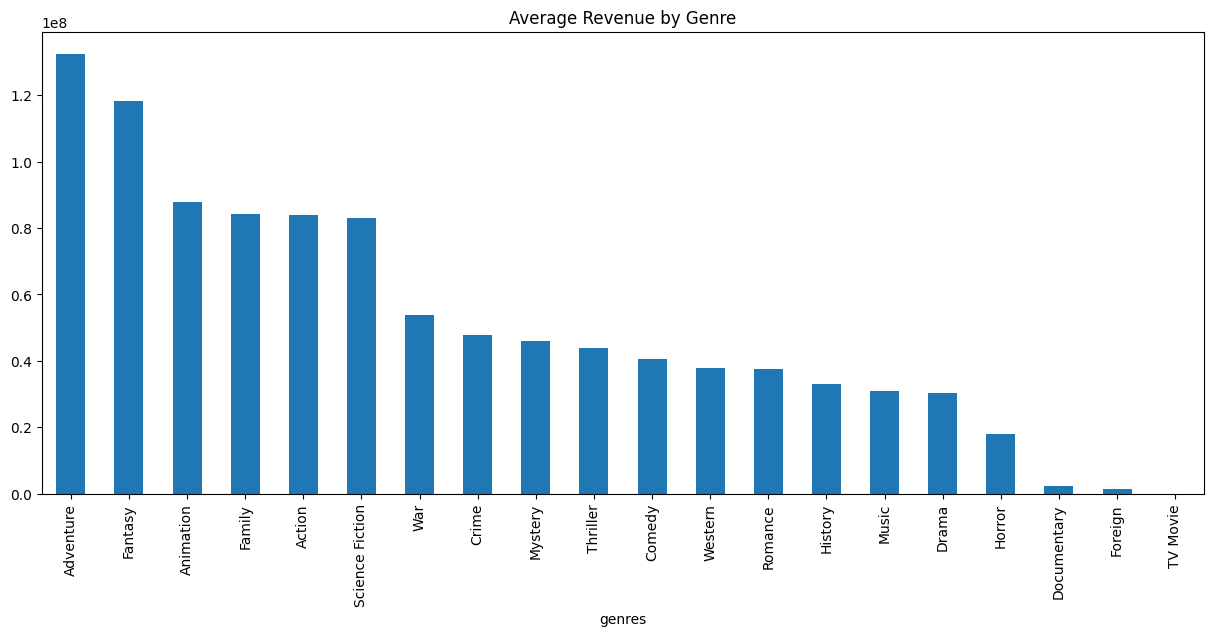

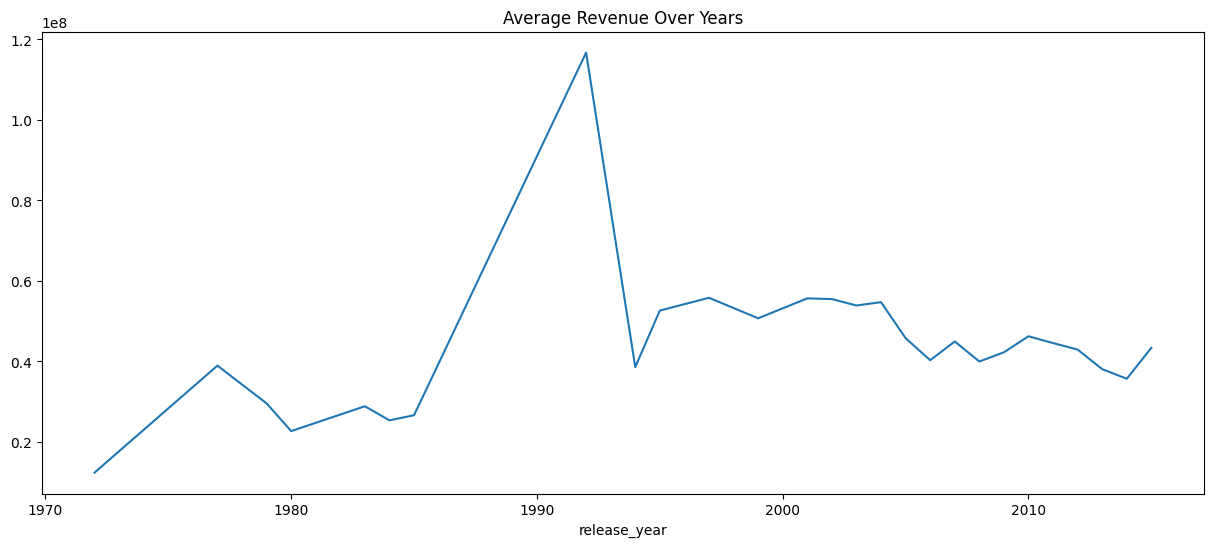

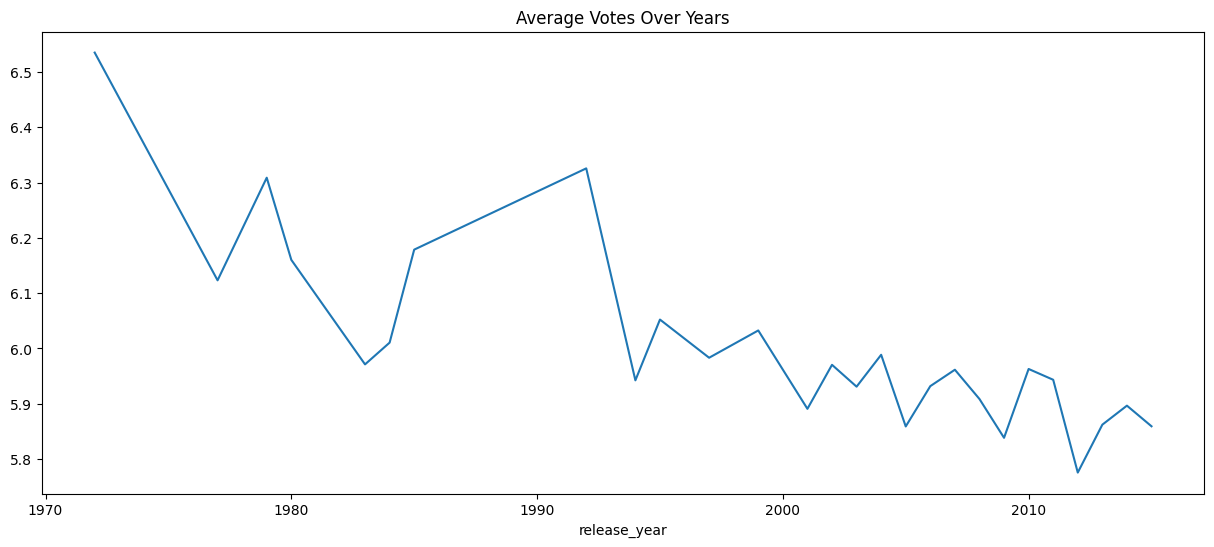

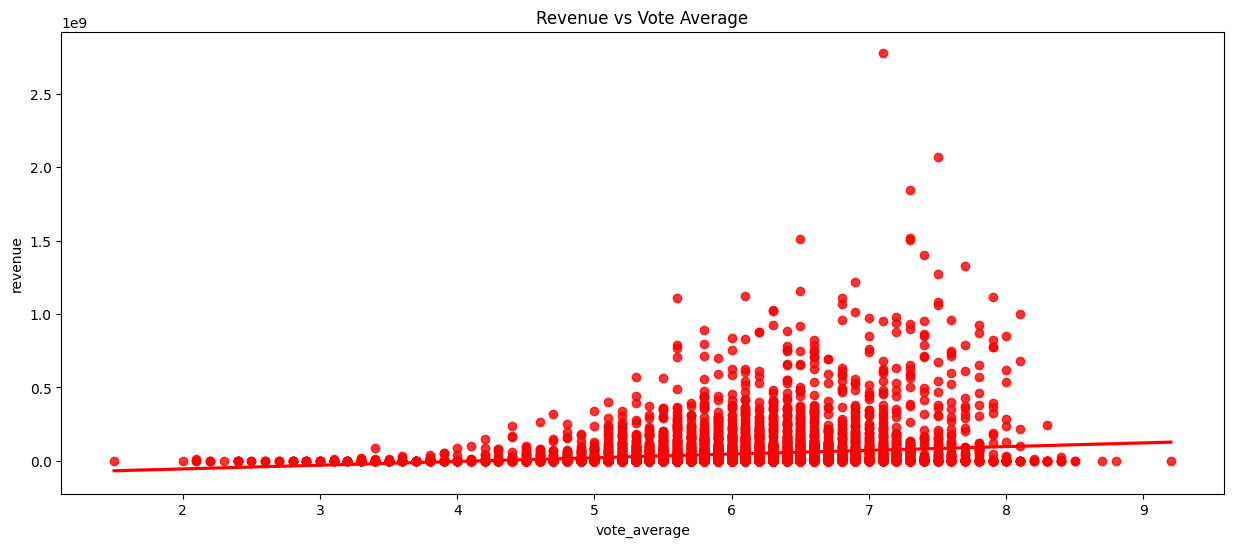

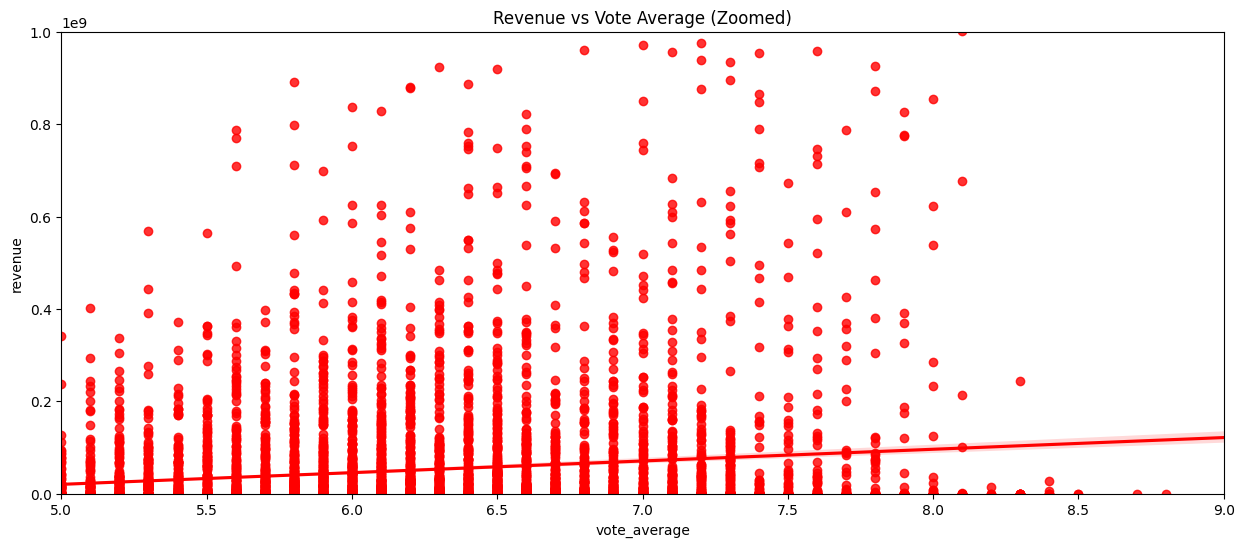

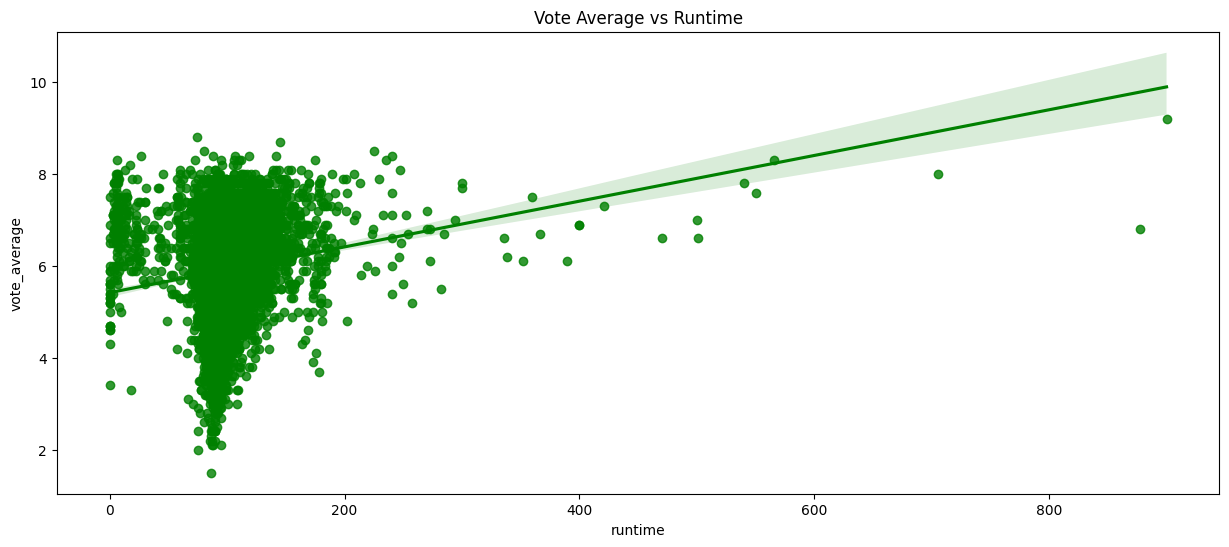

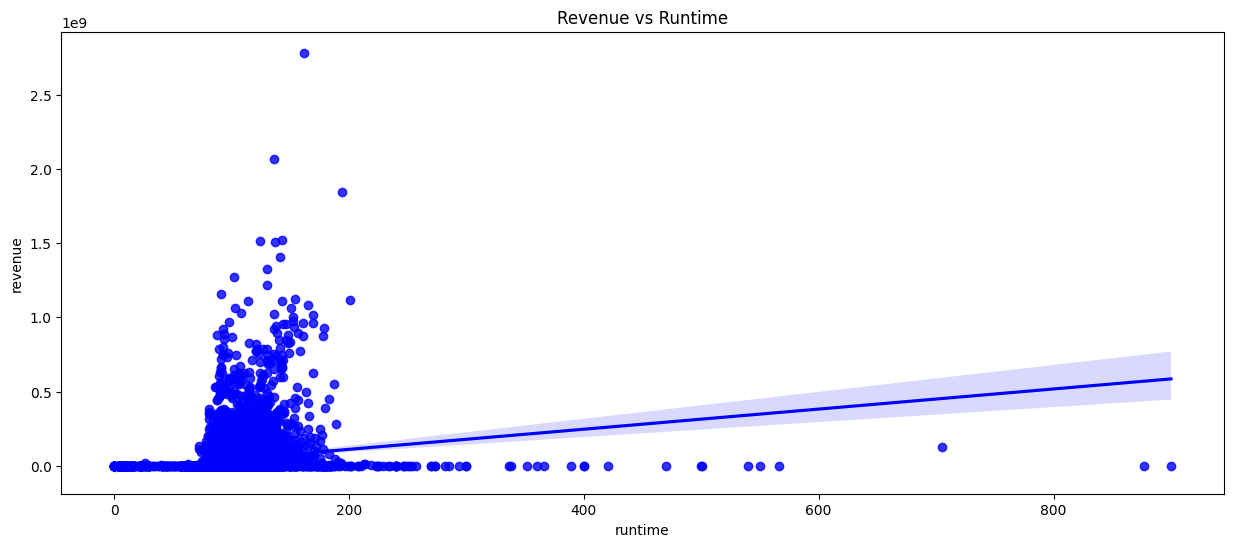

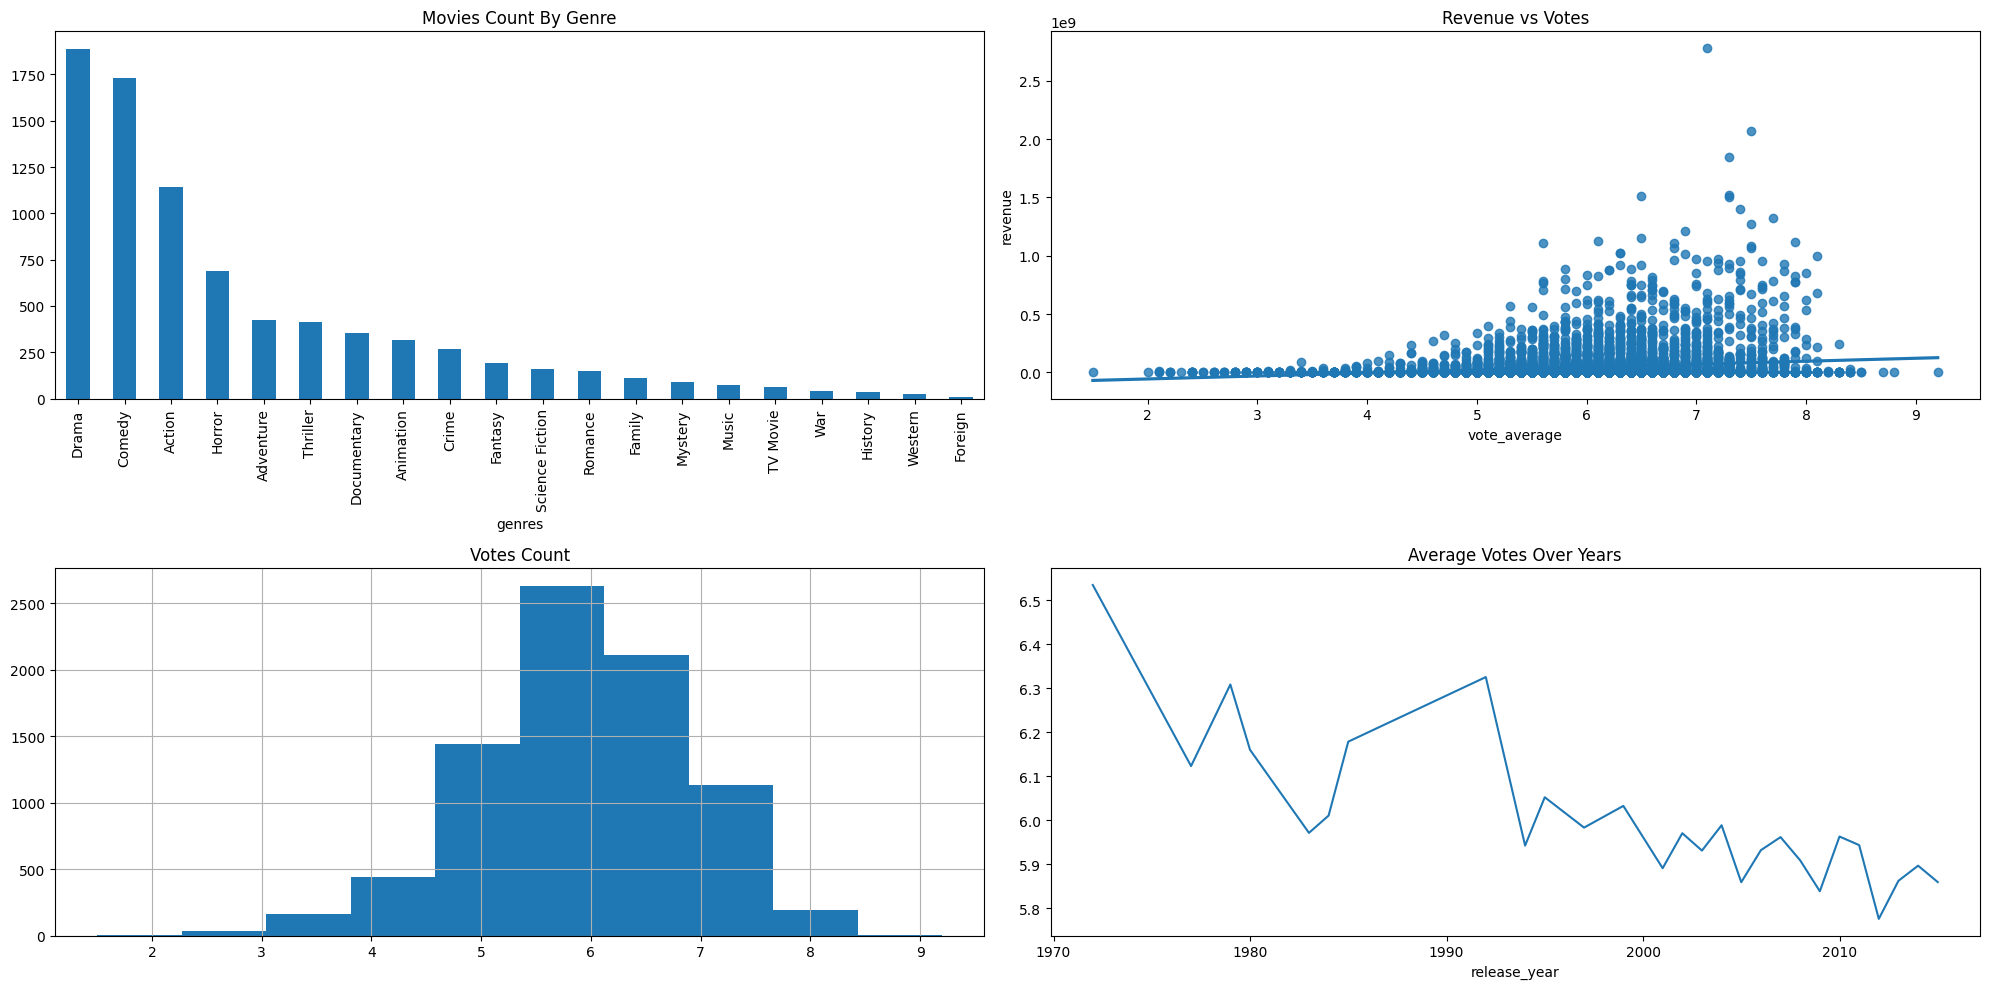

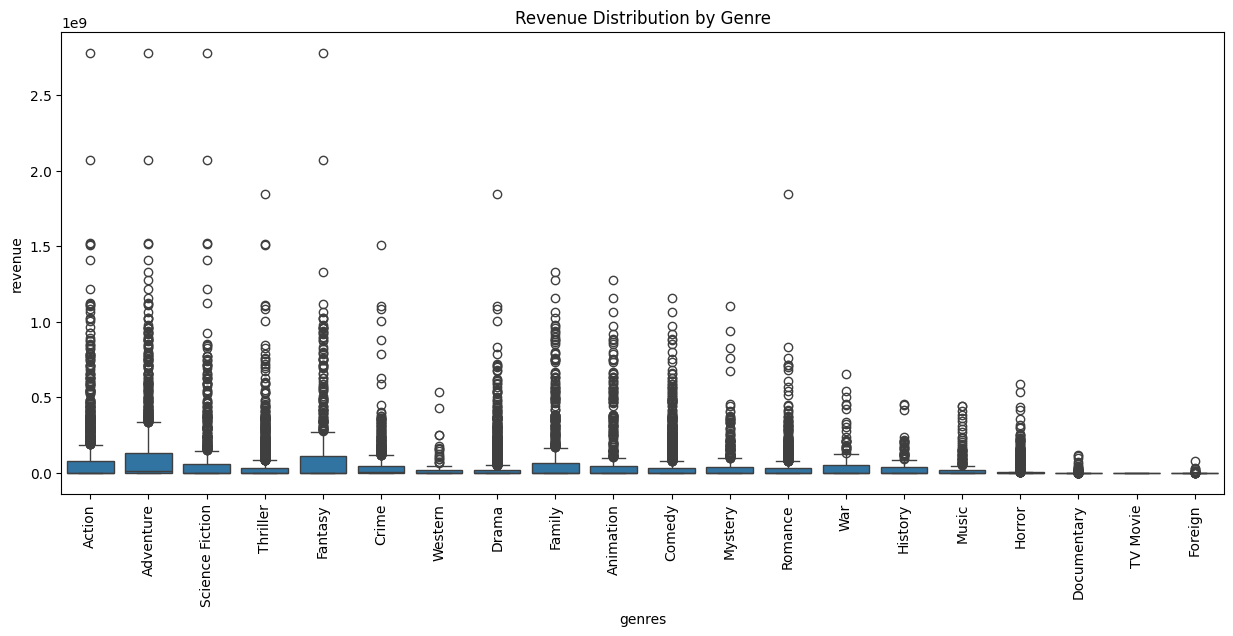

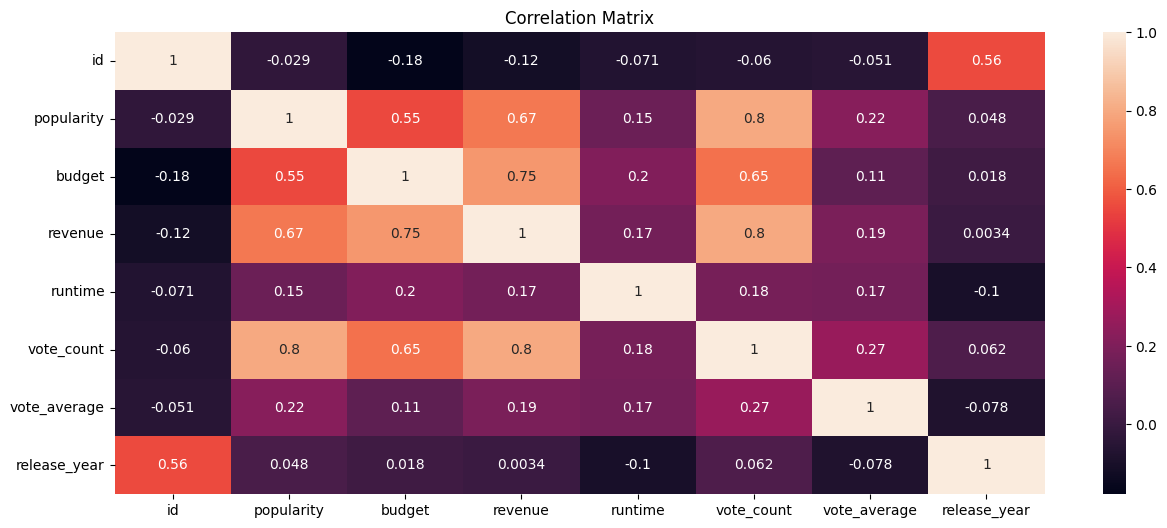

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("tmdb-movies.csv")

# Data Cleaning
df.drop(['homepage', 'imdb_id', 'tagline', 'keywords', 'overview', 'production_companies'], axis=1, inplace=True)
df.dropna(subset=['director', 'cast', 'genres'], inplace=True)
df.drop(['budget_adj', 'revenue_adj'], axis=1, inplace=True)
df.drop_duplicates(inplace=True)
df['release_date'] = pd.to_datetime(df['release_date'])

# Data Analysis and Visualization
df_genre = df.assign(genres=df['genres'].str.split('|')).explode('genres')

# Plots from the original notebook
df_genre['genres'].value_counts().plot(kind='bar', figsize=(15, 6))
plt.title('Movie Count by Genre')
plt.show()

df['director'].value_counts().nlargest(10).plot(kind='bar', figsize=(15, 6), title='Top 10 Directors')
plt.show()

df['cast'].str.split('|').str[0].value_counts().nlargest(10).plot(kind='bar', figsize=(15, 6))
plt.title('Top 10 Main Actors')
plt.show()

df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(15, 6), title='Films Count Over Years')
plt.show()

df['runtime'].hist(bins=10, figsize=(15, 6), color='green', edgecolor='black')
plt.title('Runtime Distribution')
plt.show()

df['vote_average'].hist(bins=10, figsize=(15, 6), color='red', edgecolor='black')
plt.title('Vote Average Distribution')
plt.show()

df['revenue'].hist(bins=10, figsize=(15, 6), color='blue', edgecolor='black')
plt.title('Revenue Distribution')
plt.show()

df_genre.groupby('genres')['revenue'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(15, 6))
plt.title('Average Revenue by Genre')
plt.show()

df.groupby('release_year')['revenue'].mean().plot(kind='line', figsize=(15, 6), title='Average Revenue Over Years')
plt.show()

df.groupby('release_year')['vote_average'].mean().plot(kind='line', figsize=(15, 6), title='Average Votes Over Years')
plt.show()

# Corrected plots with specified colors
plt.figure(figsize=(15, 6))
sns.regplot(data=df, x='vote_average', y='revenue', color='red')
plt.title('Revenue vs Vote Average')
plt.show()

plt.figure(figsize=(15, 6))
sns.regplot(data=df, x='vote_average', y='revenue', color='red')
plt.xlim(5, 9)
plt.ylim(0, 1000000000)
plt.title('Revenue vs Vote Average (Zoomed)')
plt.show()

plt.figure(figsize=(15, 6))
sns.regplot(data=df, x='runtime', y='vote_average', color='green')
plt.title('Vote Average vs Runtime')
plt.show()

plt.figure(figsize=(15, 6))
sns.regplot(data=df, x='runtime', y='revenue', color='blue')
plt.title('Revenue vs Runtime')
plt.show()

# Subplots
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
df['genres'].str.split('|').str[0].value_counts().plot(kind='bar')
plt.title('Movies Count By Genre')

plt.subplot(2, 2, 2)
sns.regplot(data=df, x='vote_average', y='revenue')
plt.title('Revenue vs Votes')

plt.subplot(2, 2, 3)
df['vote_average'].hist()
plt.title('Votes Count')

plt.subplot(2, 2, 4)
df.groupby('release_year')['vote_average'].mean().plot(kind='line')
plt.title('Average Votes Over Years')
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_genre, x='genres', y='revenue')
plt.xticks(rotation=90)
plt.title('Revenue Distribution by Genre')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation Matrix')
plt.show()